# Imports

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Loading CSVs

In [2]:
attacking_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/attacking_data.csv')
attempts_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/attempts_data.csv')
defending_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/defending_data.csv')
disciplinary_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/disciplinary_data.csv')
distribution_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/distribution_data.csv')
goalkeeping_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/goalkeeping_data.csv')
goals_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/goals_data.csv')
key_stats_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/key_stats_data.csv')
players_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Champions_Leagues_Dataset/players_data.csv')

In [3]:
valuations_df = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Player_Valuation_CSVs/defender_valuations.csv')

### Renaming Name Column in valuations_df

In [4]:
# Rename the column 'name' to 'player_name'
valuations_df.rename(columns={'Name': 'player_name'}, inplace=True)

In [5]:
valuations_df.head()

,player_name,Position,Age,Market Value,Club Name
0,William Saliba,Centre-Back,23,€80.00m,Arsenal FC
1,Alessandro Bastoni,Centre-Back,25,€75.00m,Inter Milan
2,Rúben Dias,Centre-Back,27,€75.00m,Manchester City
3,Josko Gvardiol,Left-Back,23,€75.00m,Manchester City
4,Trent Alexander-Arnold,Right-Back,26,€75.00m,Liverpool FC


# Merging Defenders Dataset

In [6]:
base_path = '/Users/lukewalker/code/Wukelalks/player_performance_model/1_Champions_Leagues_Dataset/'

# Read CSV files

# Filter for defenders only
defenders_df = players_df[players_df['field_position'].str.contains('Defender', na=False)]

# List of dataframes to merge (excluding `players_df` since we already filtered defenders)
dfs = [attacking_df, attempts_df, defending_df, disciplinary_df, distribution_df, 
       goalkeeping_df, goals_df, key_stats_df]

# Merge only defenders' data
merged_defenders_df = defenders_df  # Start with defenders

for df in dfs:
    merged_defenders_df = merged_defenders_df.merge(df, on='id_player', how='left')  # Adjust key if needed
    
defenders_df = merged_defenders_df

print("Merged Defenders DataFrame shape:", defenders_df.shape)

Merged Defenders DataFrame shape: (306, 53)


#  Merging Defenders and Valuations Datasets

In [7]:
# Check the player_name column in both DataFrames
print("\nSample Rows from defenders_df:")
print(defenders_df[['player_name']].head())

print("\nSample Rows from valuations_df:")
print(valuations_df[['player_name']].head())


Sample Rows from defenders_df:
        player_name
0   Antonio Rüdiger
1      Thilo Kehrer
2     Achraf Hakimi
3     Ryan Flamingo
4  Miguel Gutiérrez

Sample Rows from valuations_df:
              player_name
0          William Saliba
1      Alessandro Bastoni
2              Rúben Dias
3          Josko Gvardiol
4  Trent Alexander-Arnold


In [8]:
# Ensure defenders_df is a copy, not a view
defenders_df = defenders_df.copy()

# Now apply the string manipulation
defenders_df['player_name'] = defenders_df['player_name'].str.lower().str.strip()

In [9]:
valuations_df['player_name'] = valuations_df['player_name'].str.lower().str.strip()

In [10]:
# Merge the DataFrames on player_name
merged_df = pd.merge(defenders_df, valuations_df, on='player_name', how='inner')

# Check the resulting shape and data
print("\nShape of merged DataFrame:", merged_df.shape)
print(merged_df.head())


Shape of merged DataFrame: (176, 57)
   id_player       player_name  nationality field_position  \
0  250028211   antonio rüdiger      Germany       Defender   
1  250055663      thilo kehrer      Germany       Defender   
2  250088061     achraf hakimi      Morocco       Defender   
3  250189506     ryan flamingo  Netherlands       Defender   
4  250106969  miguel gutiérrez        Spain       Defender   

             position  weight(kg)  height(cm)  age  id_team  \
0         CENTRE_BACK        85.0       190.0   31    50051   
1  CENTRAL_MIDFIELDER        72.0       186.0   28    50023   
2              WINGER        68.0       179.0   26    52747   
3                 NaN         NaN         NaN   21    50062   
4             UNKNOWN         NaN         NaN   23  2602798   

                                        player_image  ...  other  \
0  https://img.uefa.com/imgml/TP/players/1/2025/3...  ...    0.0   
1  https://img.uefa.com/imgml/TP/players/1/2025/3...  ...    0.0   
2  htt

In [11]:
merged_df.head(133)

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image,...,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played,matches_appareance,Position,Age,Market Value,Club Name
0,250028211,antonio rüdiger,Germany,Defender,CENTRE_BACK,85.0,190.0,31,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,39.28,31.70,360.0,4.0,Centre-Back,31,€24.00m,Real Madrid
1,250055663,thilo kehrer,Germany,Defender,CENTRAL_MIDFIELDER,72.0,186.0,28,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,37.94,32.48,360.0,4.0,Centre-Back,28,€15.00m,AS Monaco
2,250088061,achraf hakimi,Morocco,Defender,WINGER,68.0,179.0,26,52747,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,44.88,36.55,360.0,4.0,Right-Back,26,€60.00m,Paris Saint-Germain
3,250189506,ryan flamingo,Netherlands,Defender,NaN,NaN,NaN,21,50062,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,44.37,32.14,360.0,4.0,Centre-Back,22,€16.00m,PSV Eindhoven
4,250106969,miguel gutiérrez,Spain,Defender,UNKNOWN,NaN,NaN,23,2602798,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,43.79,31.57,360.0,4.0,Left-Back,23,€25.00m,Girona FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,250091175,fran garcía,Spain,Defender,FULL_BACK,NaN,NaN,25,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,10.80,33.27,77.0,3.0,Left-Back,25,€15.00m,Real Madrid
129,250027008,nathan aké,Netherlands,Defender,UNKNOWN,75.0,180.0,29,52919,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,8.31,30.81,74.0,1.0,Centre-Back,30,€35.00m,Manchester City
130,250121329,nordi mukiele,France,Defender,FULL_BACK,NaN,NaN,27,50109,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,8.92,32.09,73.0,1.0,Right-Back,27,€10.00m,Bayer 04 Leverkusen
131,250063957,pascal stenzel,Germany,Defender,UNKNOWN,NaN,NaN,28,50107,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,0.0,0.0,9.53,28.86,72.0,2.0,Right-Back,28,€2.50m,VfB Stuttgart


In [12]:
# Drop the 'Age' column
merged_df = merged_df.drop(columns=['Age'])

# Rename merged_df to defenders_df
defenders_df = merged_df

In [13]:
merged_df.columns

Index(['id_player', 'player_name', 'nationality', 'field_position', 'position',
       'weight(kg)', 'height(cm)', 'age', 'id_team', 'player_image', 'assists',
       'corners_taken', 'offsides', 'dribbles', 'total_attempts',
       'attempts_on_target', 'attempts_off_target', 'blocked',
       'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost',
       'clearance_attempted', 'Unnamed: 0', 'fouls_committed',
       'fouls_suffered', 'yellow_cards', 'red_cards', 'passing_accuracy(%)',
       'passes_attempted', 'passes_completed', 'crossing_accuracy(%)',
       'crosses_attempted', 'crosses_completed', 'free_kick_taken',
       'matches_appearance', 'saves', 'goals_conceded', 'saves_on_penalty',
       'clean_sheets', 'punches_made', 'goals', 'inside_area', 'outside_area',
       'right_foot', 'left_foot', 'head', 'other', 'penalties_scored',
       'distance_covered(km/h)', 'top_speed', 'minutes_played',
       'matches_appareance', 'Position', 'Market Value', 'Club Name'],
   

# Dropping Columns

In [14]:
# Step 1: Define columns to drop
columns_to_drop = [
    'player_name_y', 'nationality_y', 'field_position_y', 
    'position', 'weight(kg)_y', 'height(cm)_y', 'age_y', 'id_team_y', 
    'player_image', 'player_image_y', 'height(cm)', 'weight(kg)',
    'Unnamed: 0', 'matches_appareance',  # Unnecessary columns
    'saves', 'goals_conceded', 'saves_on_penalty', 'clean_sheets', 'punches_made'  # Goalkeeping columns
]

# Step 2: Drop unwanted columns
merged_defenders_df_cleaned = merged_df.drop(columns=columns_to_drop, errors='ignore')

# Step 3: Rename `_x` columns
merged_defenders_df_cleaned = merged_defenders_df_cleaned.rename(
    columns=lambda col: col.replace('_x', '') if col.endswith('_x') else col
)

# Step 4: Assign cleaned DataFrame
defenders_df = merged_defenders_df_cleaned

# Step 5: Verify by printing remaining columns
print("Remaining columns: ", defenders_df.columns.tolist())

Remaining columns:  ['id_player', 'player_name', 'nationality', 'field_position', 'age', 'id_team', 'assists', 'corners_taken', 'offsides', 'dribbles', 'total_attempts', 'attempts_on_target', 'attempts_off_target', 'blocked', 'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost', 'clearance_attempted', 'fouls_committed', 'fouls_suffered', 'yellow_cards', 'red_cards', 'passing_accuracy(%)', 'passes_attempted', 'passes_completed', 'crossing_accuracy(%)', 'crosses_attempted', 'crosses_completed', 'free_kick_taken', 'matches_appearance', 'goals', 'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head', 'other', 'penalties_scored', 'distance_covered(km/h)', 'top_speed', 'minutes_played', 'Position', 'Market Value', 'Club Name']


In [15]:
defenders_df.shape

(176, 45)

# Dropping Null Values

In [16]:
defenders_df.isnull().sum()

id_player                  0
player_name                0
nationality                0
field_position             0
age                        0
id_team                    0
assists                   16
corners_taken             16
offsides                  16
dribbles                  16
total_attempts            16
attempts_on_target        16
attempts_off_target       16
blocked                   16
balls_recovered           16
tackles                   16
tackles_won               16
tackles_lost              16
clearance_attempted       16
fouls_committed           16
fouls_suffered            16
yellow_cards               0
red_cards                  0
passing_accuracy(%)       16
passes_attempted          16
passes_completed          16
crossing_accuracy(%)       0
crosses_attempted         16
crosses_completed         16
free_kick_taken           16
matches_appearance        16
goals                     16
inside_area               16
outside_area              16
right_foot    

In [17]:
# Show rows where 'matches_appearance' is null
null_matches_appearance_rows = defenders_df[defenders_df['matches_appearance'].isnull()]

# Display those rows
print(null_matches_appearance_rows)

     id_player          player_name  nationality field_position  age  id_team  \
160  250196593          zaid romero    Argentina       Defender   24    50043   
161  250188129               arthur       Brazil       Defender   21    50109   
162  250179137        iván fresneda        Spain       Defender   20    50149   
163  250177612          yoram zague       France       Defender   18    52747   
164  250171100  filippo terracciano        Italy       Defender   21    50058   
165  250163224     abdoulaye ndiaye      Senegal       Defender   22  2601306   
166  250153677       jorne spileers      Belgium       Defender   19    50043   
167  250128898          hugo siquet      Belgium       Defender   22    50043   
168  250127502            emil holm       Sweden       Defender   24    52969   
169  250127149      ameen al-dakhil      Belgium       Defender   22    50107   
170  250119144    leonidas stergiou  Switzerland       Defender   22    50107   
171  250109381        maik n

In [18]:
# Drop rows with any remaining null values
defenders_df = defenders_df.dropna()

# Show the cleaned dataframe's shape and columns
print(f"Shape after dropping null values: {defenders_df.shape}")
print("Columns after dropping null values:", defenders_df.columns)

Shape after dropping null values: (160, 45)
Columns after dropping null values: Index(['id_player', 'player_name', 'nationality', 'field_position', 'age',
       'id_team', 'assists', 'corners_taken', 'offsides', 'dribbles',
       'total_attempts', 'attempts_on_target', 'attempts_off_target',
       'blocked', 'balls_recovered', 'tackles', 'tackles_won', 'tackles_lost',
       'clearance_attempted', 'fouls_committed', 'fouls_suffered',
       'yellow_cards', 'red_cards', 'passing_accuracy(%)', 'passes_attempted',
       'passes_completed', 'crossing_accuracy(%)', 'crosses_attempted',
       'crosses_completed', 'free_kick_taken', 'matches_appearance', 'goals',
       'inside_area', 'outside_area', 'right_foot', 'left_foot', 'head',
       'other', 'penalties_scored', 'distance_covered(km/h)', 'top_speed',
       'minutes_played', 'Position', 'Market Value', 'Club Name'],
      dtype='object')


In [19]:
defenders_df.isnull().sum()

id_player                 0
player_name               0
nationality               0
field_position            0
age                       0
id_team                   0
assists                   0
corners_taken             0
offsides                  0
dribbles                  0
total_attempts            0
attempts_on_target        0
attempts_off_target       0
blocked                   0
balls_recovered           0
tackles                   0
tackles_won               0
tackles_lost              0
clearance_attempted       0
fouls_committed           0
fouls_suffered            0
yellow_cards              0
red_cards                 0
passing_accuracy(%)       0
passes_attempted          0
passes_completed          0
crossing_accuracy(%)      0
crosses_attempted         0
crosses_completed         0
free_kick_taken           0
matches_appearance        0
goals                     0
inside_area               0
outside_area              0
right_foot                0
left_foot           

In [20]:
defenders_df.head(25)

,id_player,player_name,nationality,field_position,age,id_team,assists,corners_taken,offsides,dribbles,...,left_foot,head,other,penalties_scored,distance_covered(km/h),top_speed,minutes_played,Position,Market Value,Club Name
0,250028211,antonio rüdiger,Germany,Defender,31,50051,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,39.28,31.70,360.0,Centre-Back,€24.00m,Real Madrid
1,250055663,thilo kehrer,Germany,Defender,28,50023,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.94,32.48,360.0,Centre-Back,€15.00m,AS Monaco
2,250088061,achraf hakimi,Morocco,Defender,26,52747,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,44.88,36.55,360.0,Right-Back,€60.00m,Paris Saint-Germain
3,250189506,ryan flamingo,Netherlands,Defender,21,50062,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44.37,32.14,360.0,Centre-Back,€16.00m,PSV Eindhoven
4,250106969,miguel gutiérrez,Spain,Defender,23,2602798,0.0,3.0,0.0,10.0,...,1.0,0.0,0.0,0.0,43.79,31.57,360.0,Left-Back,€25.00m,Girona FC
5,50327420,virgil van dijk,Netherlands,Defender,33,7889,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,37.76,34.92,360.0,Centre-Back,€28.00m,Liverpool FC
6,250096309,jules koundé,France,Defender,25,50080,3.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,43.39,31.61,360.0,Right-Back,€60.00m,FC Barcelona
7,250139207,rico lewis,England,Defender,19,52919,1.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,44.24,32.53,360.0,Right-Back,€40.00m,Manchester City
8,250134856,nico schlotterbeck,Germany,Defender,24,52758,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,41.20,32.85,360.0,Centre-Back,€40.00m,Borussia Dortmund
9,250092668,dávid hancko,Slovakia,Defender,26,52749,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,40.40,32.74,360.0,Centre-Back,€35.00m,Feyenoord Rotterdam


# Feature Selection

In [21]:
print("\n".join(defenders_df.columns))

id_player
player_name
nationality
field_position
age
id_team
assists
corners_taken
offsides
dribbles
total_attempts
attempts_on_target
attempts_off_target
blocked
balls_recovered
tackles
tackles_won
tackles_lost
clearance_attempted
fouls_committed
fouls_suffered
yellow_cards
red_cards
passing_accuracy(%)
passes_attempted
passes_completed
crossing_accuracy(%)
crosses_attempted
crosses_completed
free_kick_taken
matches_appearance
goals
inside_area
outside_area
right_foot
left_foot
head
other
penalties_scored
distance_covered(km/h)
top_speed
minutes_played
Position
Market Value
Club Name


In [22]:
selected_features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']

In [23]:
# Step 1: Remove the euro sign (€) and 'm'
defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('€', '', regex=True)  # Remove €
defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('m', '', regex=True)  # Remove 'm'

# Step 2: Convert to a float
defenders_df['Market Value'] = defenders_df['Market Value'].astype(float)

# Preview the cleaned Market Value column
print(defenders_df[['Market Value']].head())

   Market Value
0          24.0
1          15.0
2          60.0
3          16.0
4          25.0


/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_19098/350447833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('€', '', regex=True)  # Remove €
/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_19098/350447833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders_df['Market Value'] = defenders_df['Market Value'].str.replace('m', '', regex=True)  # Remove 'm'
/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn

# Building The Model (Linear Regression)

In [24]:
# Define the features (X) and target (y)
selected_features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']

X = defenders_df[selected_features]
y = defenders_df['Market Value']

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (128, 5)
Test Set Shape: (32, 5)


In [26]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print model coefficients for interpretation
print("Model Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef}")

Model Coefficients:
tackles_won: -1.599310481554178
clearance_attempted: -5.885291884584653
passing_accuracy(%): 2.085844633012675
yellow_cards: -1.6250702801239036
minutes_played: 9.155452269254255


In [28]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [29]:
# Evaluate the model using Mean Squared Error (lower MSE is better)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 303.78


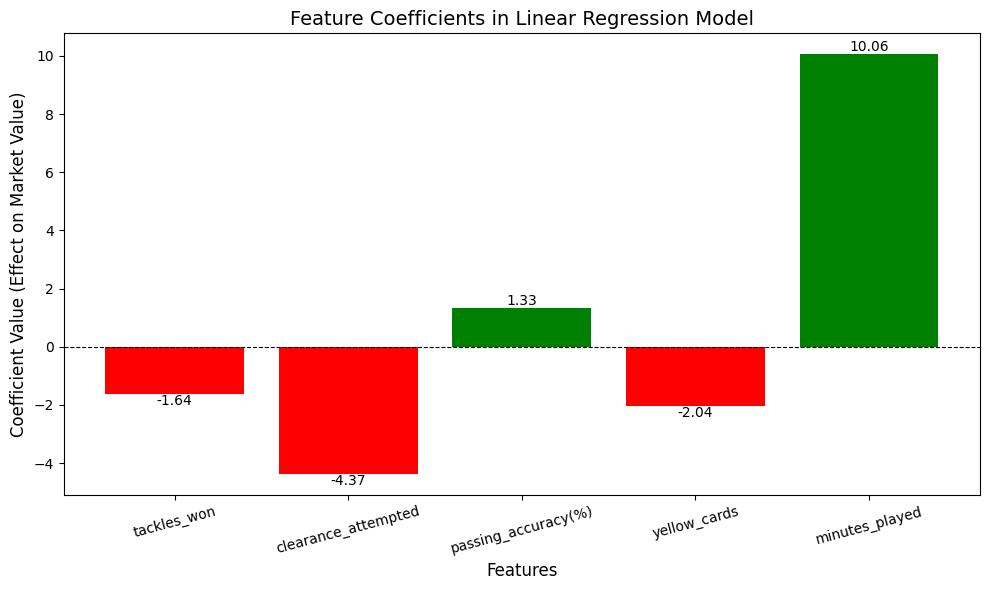

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from your model
features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']
coefficients = [-1.6413396217193335, -4.368805203655599, 1.3289357445213543, -2.0399128279127297, 10.057983553462643]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(features, coefficients, color=['red' if coef < 0 else 'green' for coef in coefficients])

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Chart formatting
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at 0
plt.title('Feature Coefficients in Linear Regression Model', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value (Effect on Market Value)', fontsize=12)
plt.xticks(rotation=15)  # Rotate feature labels for better readability
plt.tight_layout()
plt.show()

In [31]:
# Scale back coefficients
coefficients_in_euros = [coef * 1_000_000 for coef in coefficients]

for feature, coef in zip(features, coefficients_in_euros):
    print(f"{feature}: Each unit increases/decreases market value by €{coef:,.0f}.")

tackles_won: Each unit increases/decreases market value by €-1,641,340.
clearance_attempted: Each unit increases/decreases market value by €-4,368,805.
passing_accuracy(%): Each unit increases/decreases market value by €1,328,936.
yellow_cards: Each unit increases/decreases market value by €-2,039,913.
minutes_played: Each unit increases/decreases market value by €10,057,984.


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)                       # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)             # R-squared

# Print Metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 13.50
Mean Squared Error (MSE): 303.78
Root Mean Squared Error (RMSE): 17.43
R-squared (R² Score): 0.01


In [33]:
# Calculate metrics for training set predictions
y_train_pred = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set predictions
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

# Print train vs test metrics
print("Train vs Test Set Performance:")
print(f"Training Set: MAE = {mae_train:.2f}, MSE = {mse_train:.2f}, RMSE = {rmse_train:.2f}, R² = {r2_train:.2f}")
print(f"Test Set:    MAE = {mae_test:.2f}, MSE = {mse_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.2f}")

Train vs Test Set Performance:
Training Set: MAE = 12.90, MSE = 268.15, RMSE = 16.38, R² = 0.19
Test Set:    MAE = 13.50, MSE = 303.78, RMSE = 17.43, R² = 0.01


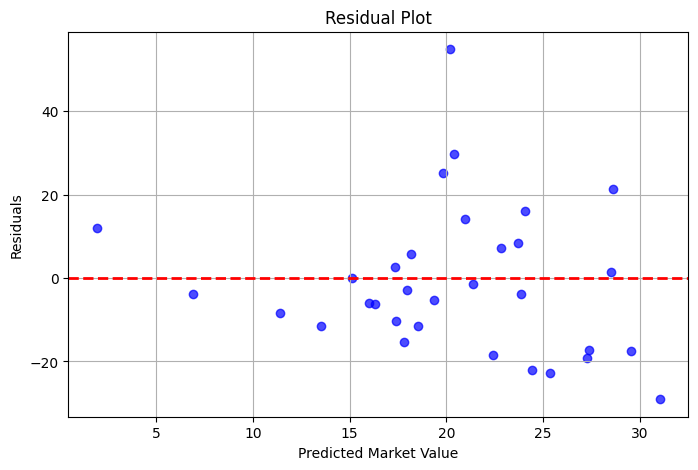

In [34]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Market Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

# Building The Model (Lasso Regression)

In [35]:
# Define the features (X) and target (y)
selected_features = ['tackles_won', 'clearance_attempted', 'passing_accuracy(%)', 'yellow_cards', 'minutes_played']

X = defenders_df[selected_features]
y = defenders_df['Market Value']

In [36]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (128, 5)
Test Set Shape: (32, 5)


In [37]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso regression model
alpha_value = 0.1  # Regularization strength (you can tune this later)
lasso = Lasso(alpha=alpha_value)  # Initialize Lasso with a specific alpha
lasso.fit(X_train_scaled, y_train)  # Train the Lasso regression model

# Print Lasso model coefficients for interpretation
print("\nLasso Model Coefficients:")
for feature, coef in zip(selected_features, lasso.coef_):
    print(f"{feature}: {coef}")


Lasso Model Coefficients:
tackles_won: -1.524226197525331
clearance_attempted: -5.657078217830758
passing_accuracy(%): 2.0240260374205747
yellow_cards: -1.5066536062447085
minutes_played: 8.865862223404768


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Lasso Model Performance:
Mean Absolute Error (MAE): 13.49
Mean Squared Error (MSE): 302.15
Root Mean Squared Error (RMSE): 17.38
R-squared (R²): 0.01


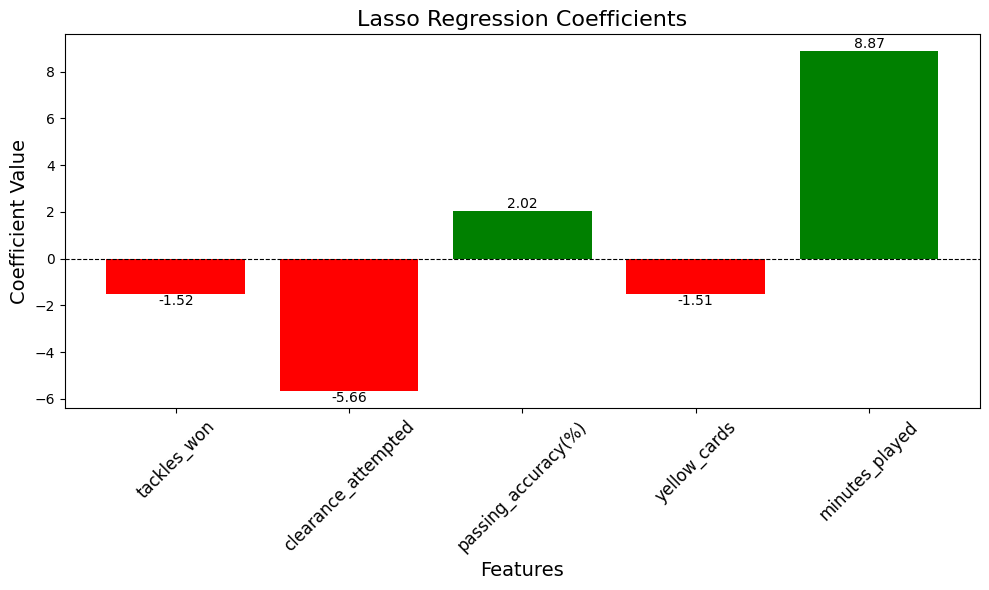

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'selected_features' contains the feature names
# and 'lasso.coef_' contains the Lasso coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=selected_features)

# Plot coefficients as a bar chart
plt.figure(figsize=(10, 6))
bar_colors = ['red' if coef < 0 else 'green' for coef in lasso_coefficients]  # Positive = green, Negative = red
bars = plt.bar(lasso_coefficients.index, lasso_coefficients.values, color=bar_colors)

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    # Place text above positive bars and below negative bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
             ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Add title and labels
plt.title('Lasso Regression Coefficients', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Format the x-axis labels (rotate for readability)
plt.xticks(rotation=45, fontsize=12)

# Optimize layout
plt.tight_layout()
plt.show()

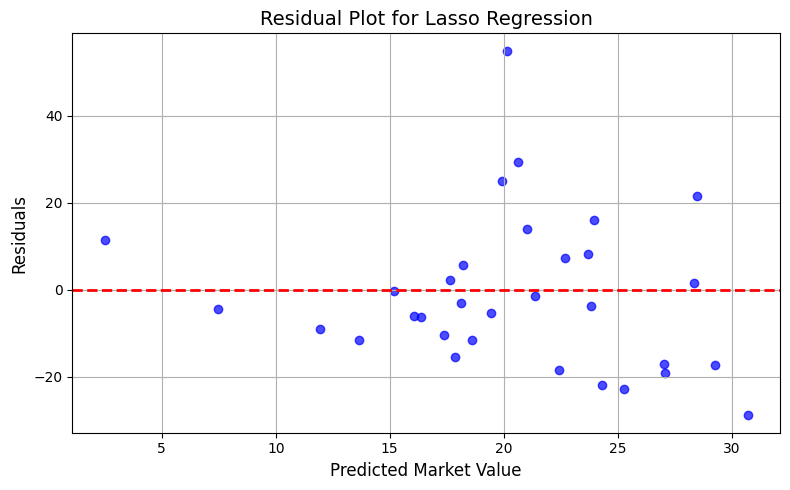

In [41]:
# Perform predictions using the Lasso model
y_pred_lasso = lasso.predict(X_test_scaled)  # Replace 'lasso' with your Lasso regression model

# Calculate residuals
residuals = y_test - y_pred_lasso

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_lasso, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Reference line at residual = 0
plt.xlabel('Predicted Market Value', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot for Lasso Regression', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Comparing Linear Regression vs Lasso

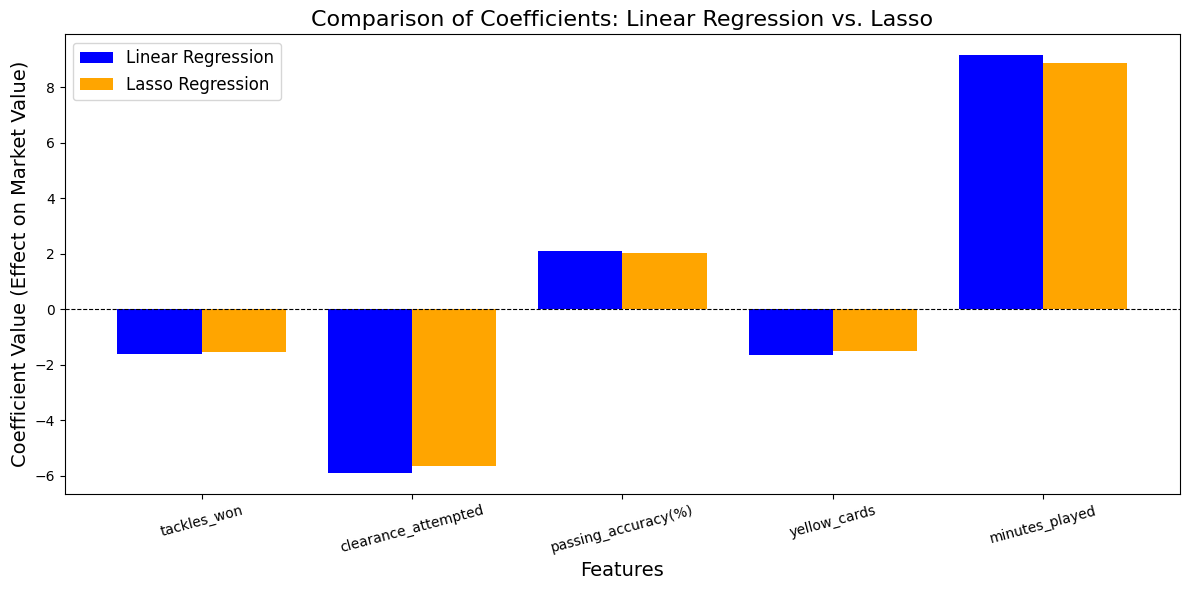

In [42]:
# Coefficients from Linear and Lasso Regression
linear_coefficients = model.coef_  # From Linear Regression
lasso_coefficients = lasso.coef_  # From Lasso Regression

# Combine into a DataFrame
comparison_df = pd.DataFrame({
    'Features': features,
    'Linear Regression': linear_coefficients,
    'Lasso Regression': lasso_coefficients
}).set_index('Features')

# Plot a comparison bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'], width=0.8)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.title('Comparison of Coefficients: Linear Regression vs. Lasso', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value (Effect on Market Value)', fontsize=14)
plt.xticks(rotation=15)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Building The Model (Random Forest/GridSearchCV)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid (parameters to tune)
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Max depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Number of features considered for splitting
}

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,    # Model
    param_grid=param_grid,      # Hyperparameter grid
    scoring='neg_mean_squared_error',  # Evaluation metric (negated since GridSearch minimizes by default)
    cv=5,                       # Number of folds in cross-validation
    verbose=2,                  # Show progress while tuning
    n_jobs=-1                   # Parallel processing to speed up computation
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Extract and print the best parameters and score
print("Best Parameters:", grid_search.best_params_)  # Optimal hyperparameter values
print("Best Score (Negative MSE):", grid_search.best_score_)  # Best cross-validated score# Predict on the test set

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score (Negative MSE): -288.99933639580865
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_feat

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, 

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, m

In [53]:
# Train the Random Forest with Best Parameters
best_random_forest = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Retrain the best model
best_random_forest.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MAE: {mae_best_rf:.2f}")
print(f"Optimized Random Forest R²: {r2_best_rf:.2f}")

Optimized Random Forest MAE: 13.09
Optimized Random Forest R²: 0.04


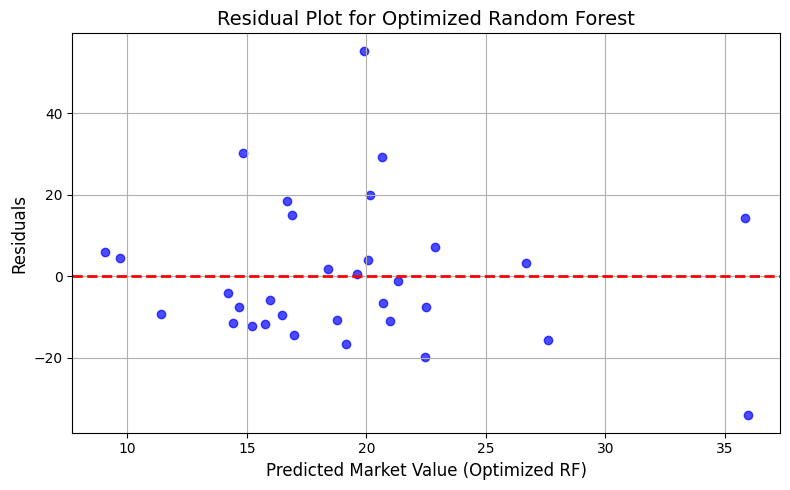

In [54]:
# Predict on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculate residuals for the optimized Random Forest
residuals_rf_best = y_test - y_pred_best_rf

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_best_rf, residuals_rf_best, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Market Value (Optimized RF)", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot for Optimized Random Forest", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure that residuals and predictions for the Optimized RF are computed
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculate metrics for the Optimized RF
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Compare metrics from all models (Linear Regression, Lasso, and Optimized RF)
model_metrics = {
    "Model": ["Linear Regression", "Lasso Regression", "Optimized RF"],
    "MAE": [
        mean_absolute_error(y_test, model.predict(X_test_scaled)), 
        mean_absolute_error(y_test, lasso.predict(X_test_scaled)),
        mae_best_rf  # Calculated above for Optimized RF
    ],
    "MSE": [
        mean_squared_error(y_test, model.predict(X_test_scaled)), 
        mean_squared_error(y_test, lasso.predict(X_test_scaled)), 
        mse_best_rf  # Calculated above for Optimized RF
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, model.predict(X_test_scaled))), 
        np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled))), 
        rmse_best_rf  # Calculated above for Optimized RF
    ],
    "R²": [
        r2_score(y_test, model.predict(X_test_scaled)), 
        r2_score(y_test, lasso.predict(X_test_scaled)), 
        r2_best_rf  # Calculated above for Optimized RF
    ]
}

# Convert to a DataFrame for a cleaner table view
import pandas as pd
metrics_df = pd.DataFrame(model_metrics)

# Print the comparison table
print(metrics_df)

               Model        MAE         MSE       RMSE        R²
0  Linear Regression  13.497148  303.778666  17.429247  0.006390
1   Lasso Regression  13.490016  302.149173  17.382439  0.011719
2       Optimized RF  13.086109  294.671067  17.165986  0.036179


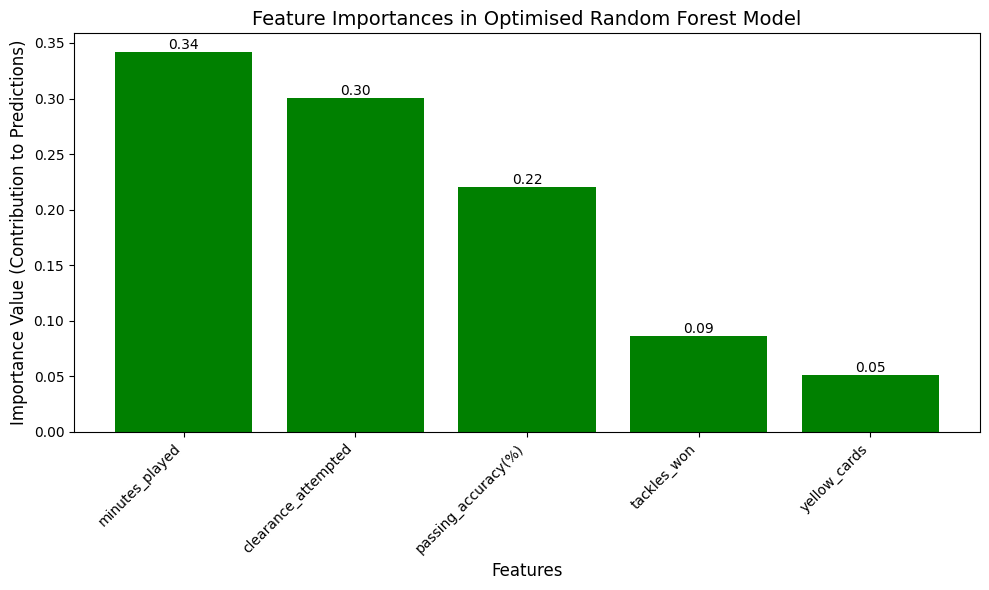

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Feature names and their importances from the optimized Random Forest
features = selected_features  # Replace this with the list of features used in your model
importances = best_random_forest.feature_importances_  # Extract feature importances from optimized RF

# Sort feature importances for better display
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Create a bar chart for feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], 
               color=['green' if imp > 0 else 'red' for imp in feature_importances['Importance']])

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title('Feature Importances in Optimised Random Forest Model', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Value (Contribution to Predictions)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for better readability
plt.tight_layout()
plt.show()

In [57]:
import pandas as pd

# Recreate DataFrame from the scaled array
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Verify the DataFrame looks correct
print(X_test_scaled_df.head())

   tackles_won  clearance_attempted  passing_accuracy(%)  yellow_cards  \
0    -0.890093            -0.094475             0.865463      0.923812   
1    -0.890093             0.409394             0.602451     -0.632082   
2    -0.890093            -0.934258             1.102410     -0.632082   
3     0.368823            -0.094475            -0.200801      0.923812   
4    -0.260635             0.073481             0.391568      0.923812   

   minutes_played  
0       -0.409094  
1       -0.433974  
2       -1.495519  
3        0.528051  
4       -0.234934  


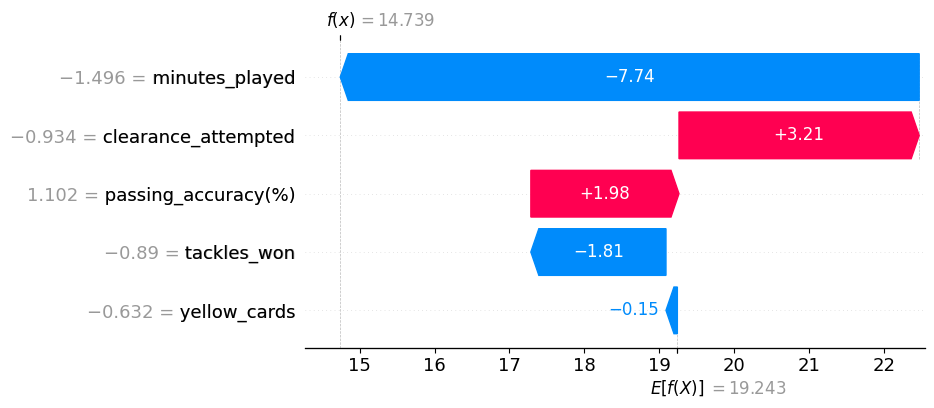

In [58]:
import shap

# Create a SHAP explainer for the optimized Random Forest
explainer = shap.Explainer(best_random_forest, X_test_scaled_df)

# Compute SHAP values for the test set
shap_values = explainer(X_test_scaled_df)

# Visualize SHAP values for a single instance (e.g., the first player in the test set)
shap.waterfall_plot(shap.Explanation(
    values=shap_values[2].values, 
    base_values=shap_values[2].base_values, 
    data=X_test_scaled_df.iloc[2], 
    feature_names=selected_features  # Use feature names
))

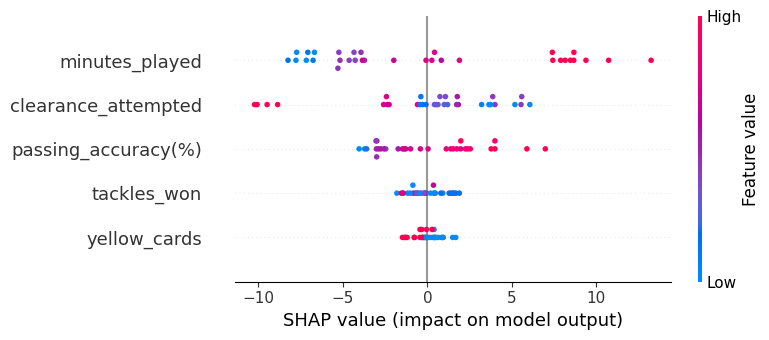

In [59]:
# Use SHAP summary plot to visualize global feature contributions
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=selected_features)